In [277]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite.basic import color
from scipy.stats import alpha

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [278]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

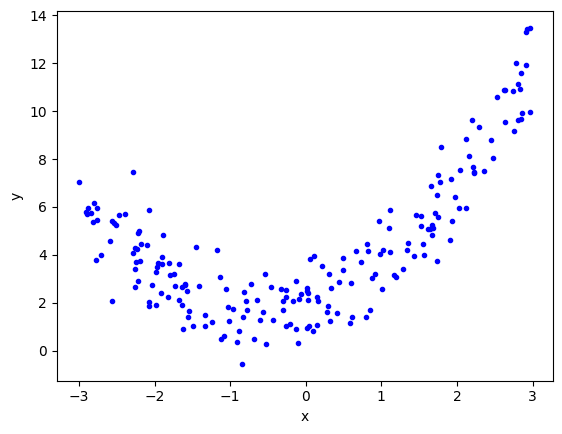

In [279]:
plt.plot(X, y, 'b. ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [281]:
lr = LinearRegression()

In [282]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [283]:
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.20222067469358074

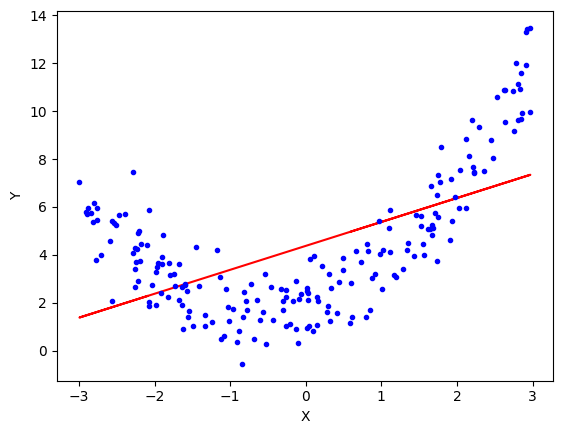

In [284]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [285]:
# Apply polynomial linear regression
# degree 2(for every input column x you will have three columns for the same

poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trf = poly.fit_transform(X_train)
X_test_trf = poly.transform(X_test)

In [286]:
print(X_train[0])
print(X_train_trf[0])

[-2.09490625]
[ 1.         -2.09490625  4.38863221]


In [287]:
lr2 = LinearRegression()
lr2.fit(X_train_trf, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [288]:
y_pred2 = lr2.predict(X_test_trf)
r2_score(y_test, y_pred2)

0.794326644730256

In [289]:
print(lr2.coef_)
print(lr2.intercept_)

[[0.         0.92391504 0.82705165]]
[1.80062464]


In [290]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr2.predict(X_new_poly)

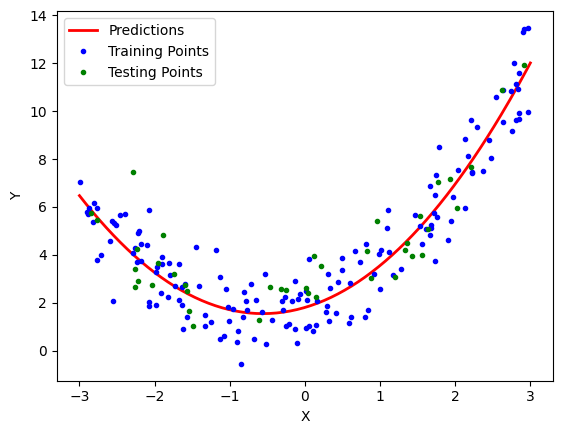

In [291]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()